In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse, mse
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col=0, parse_dates=True)

In [3]:
df.index.freq='MS'

In [4]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [5]:
df.tail()

,Employees
Date,
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3
2018-11-01,1990.1
2018-12-01,2000.2


# EDA

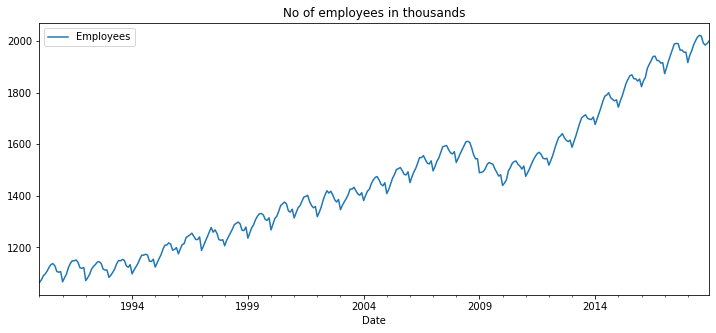

In [7]:
title = 'No of employees in thousands'
df.plot()
plt.title(title);

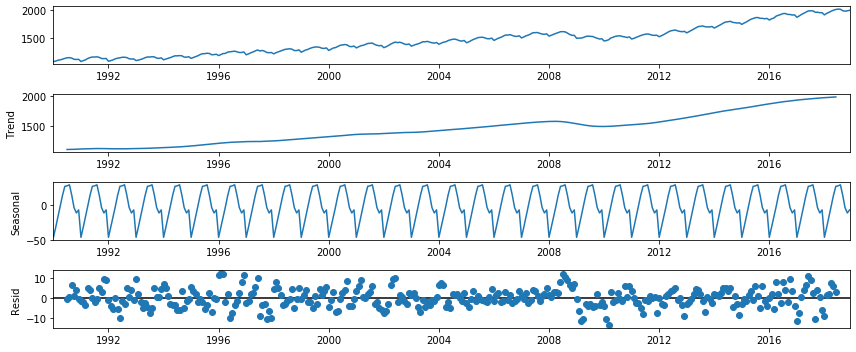

In [8]:
seasonal_decompose(df).plot();

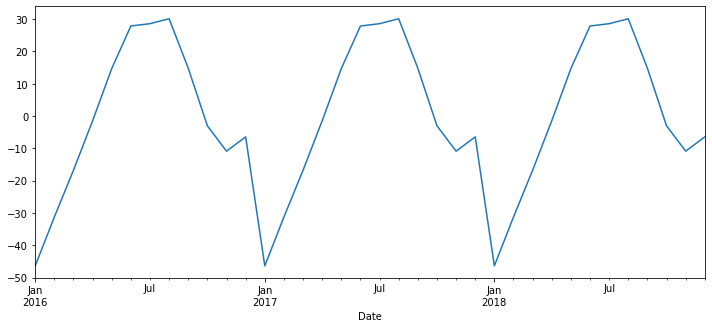

In [9]:
seasonal_decompose(df).seasonal.loc['2016':].plot();

# Grid Search

In [11]:
auto_arima(df, seasonal=True, m=12, trace=True, start_p=0, start_q=0).summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=2232.831, BIC=2248.228, Fit time=0.379 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2974.636, BIC=2982.335, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2341.614, BIC=2357.011, Fit time=0.315 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2707.381, BIC=2722.778, Fit time=0.361 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=2707.813, BIC=2719.361, Fit time=0.161 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=2233.771, BIC=2253.017, Fit time=2.601 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2339.917, BIC=2351.465, Fit time=0.247 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 2, 12); AIC=2233.833, BIC=2253.080, Fit time=1.893 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 2, 12); AIC=2236.423, BIC=2259.518, Fit time=1.601 seconds
Fit ARIMA: order=(1, 1, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1112.415
Date:                              Sat, 04 Jul 2020   AIC                           2232.831
Time:                                      21:40:06   BIC                           2248.228
Sample:                                           0   HQIC                          2238.961
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0115      0.028      0.410      0.682      -0.044       0.067
ar.S.L12       0.9957      0.002    419.633      0.000       0.991       1.000
ma.S.L12      -0.7233      0.043    -16.771      0.000      -0.808      -0.639
sigma2        32.1841      2.007     16.039      0.000      28.251      36.117
===================================================================================
Ljung-Box (Q):                       96.13   Jarque-Bera (JB):                42.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.37
Prob(H) (two-sided):                  0.93   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train test split

In [13]:
train = df.iloc[:-12]

In [14]:
test = df.iloc[-12:]

# Model

In [16]:
model = SARIMAX(train['Employees'], order=(0,1,0),seasonal_order=(1, 0, [1], 12)).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1073.552
Date:                              Sat, 04 Jul 2020   AIC                           2153.104
Time:                                      21:40:06   BIC                           2164.547
Sample:                                  01-01-1990   HQIC                          2157.666
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9957      0.002    476.642      0.000       0.992       1.000
ma.S.L12      -0.7202      0.044    -16.216      0.000      -0.807      -0.633
sigma2        31.9841      2.012     15.896      0.000      28.040      35.928
===================================================================================
Ljung-Box (Q):                       94.89   Jarque-Bera (JB):                49.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.43
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred = model.predict(start=len(train), end=len(df)-1, typ='levels',dynamic=False).rename('SARIMA Predictions')

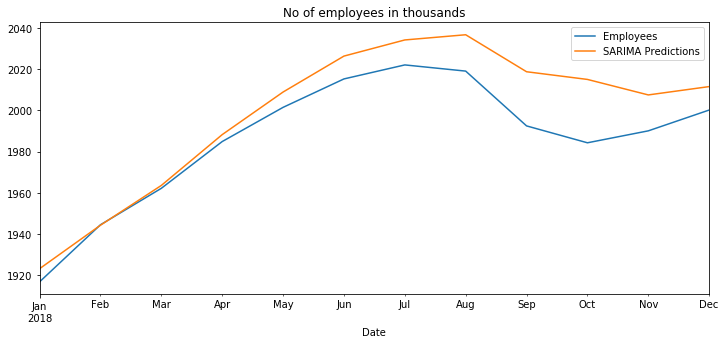

In [19]:
test.plot()
pred.plot()
plt.title(title)
plt.legend();

In [20]:
print('RMSE Sarima model : {}'.format(rmse(test['Employees'], pred)))

RMSE Sarima model : 15.16850764486462


In [21]:
test['Employees'].describe()

count      12.00000
mean     1986.12500
std        31.39123
min      1916.80000
25%      1978.77500
50%      1991.30000
75%      2004.95000
max      2022.10000
Name: Employees, dtype: float64

#  Retrain the model on the full data and forecast one year into the future

In [22]:
model = SARIMAX(df['Employees'], order=(0,1,0),seasonal_order=(1, 0, [1], 12)).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1112.570
Date:                              Sat, 04 Jul 2020   AIC                           2231.140
Time:                                      21:40:44   BIC                           2242.688
Sample:                                  01-01-1990   HQIC                          2235.738
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9958      0.002    489.262      0.000       0.992       1.000
ma.S.L12      -0.7231      0.043    -16.738      0.000      -0.808      -0.638
sigma2        32.1867      2.006     16.043      0.000      28.255      36.119
===================================================================================
Ljung-Box (Q):                       95.96   Jarque-Bera (JB):                42.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.37
Prob(H) (two-sided):                  0.95   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
forecast = model.predict(start=len(df), end=len(df)+11, typ='levels',dynamic=False).rename('SARIMA Forecast')

In [25]:
forecast

2019-01-01    1964.574780
2019-02-01    1987.369499
2019-03-01    2006.150802
2019-04-01    2030.157116
2019-05-01    2049.634200
2019-06-01    2066.009793
2019-07-01    2073.522430
2019-08-01    2074.540286
2019-09-01    2054.321924
2019-10-01    2049.346234
2019-11-01    2045.494067
2019-12-01    2051.195708
Freq: MS, Name: SARIMA Forecast, dtype: float64

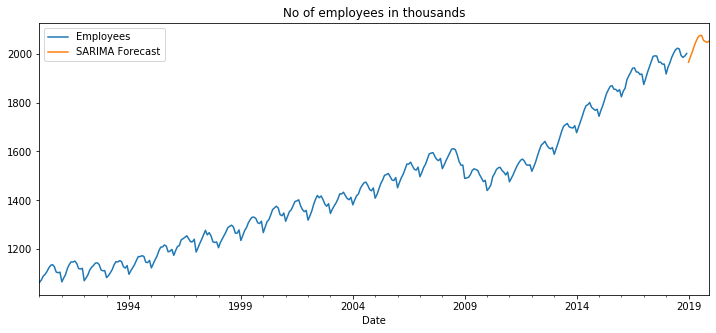

In [26]:
df.plot()
forecast.plot()
plt.title(title)
plt.legend();

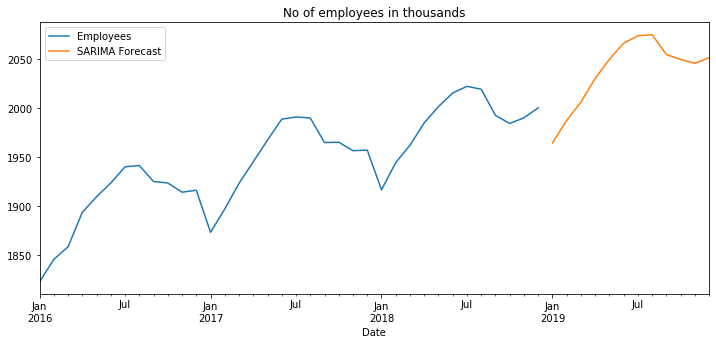

In [27]:
df.loc['2016':].plot()
forecast.plot()
plt.title(title)
plt.legend();